<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/academia/predictiveModeling/code/Linear_Regression_Cars_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing

In [42]:
!git clone 'https://github.com/sarang-manohar/hogwarts.git'

fatal: destination path 'hogwarts' already exists and is not an empty directory.


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [44]:
rd = pd.read_csv(r'/content/hogwarts/academia/predictiveModeling/data/car-mpg.csv')
rd.head(50)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


In [45]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [46]:
rd.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [47]:
dups = rd.duplicated()
display(rd[dups])

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name


In [48]:
temp = rd['hp'].str.isdigit()
rd[temp == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,1,amc concord dl


In [49]:
rd['hp'] = rd['hp'].replace('?',np.nan).astype(float)

In [50]:
rd.groupby(by='cyl').median()

,mpg,disp,hp,wt,acc,yr,origin,car_type
cyl,,,,,,,,
3,20.25,70.0,98.5,2375.0,13.5,75.0,3.0,1.0
4,28.25,105.0,78.0,2232.0,16.2,78.0,2.0,1.0
5,25.40,131.0,77.0,2950.0,19.9,79.0,2.0,1.0
6,19.00,228.0,100.0,3201.5,16.1,76.0,1.0,0.0
8,14.00,350.0,150.0,4140.0,13.0,73.0,1.0,0.0


In [51]:
rd[temp == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,amc concord dl


In [52]:
df_not_null = rd[temp == True]
df_null = rd[temp == False]
print('Shape of not null data set:',df_not_null.shape)
print('Shape of data set with null values:',df_null.shape)

Shape of not null data set: (392, 10)
Shape of data set with null values: (6, 10)


In [53]:
df_null_4 = df_null[df_null.cyl == 4]

df_null_4.fillna(78, inplace = True)

df_null_4

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,78.0,2046,19.0,71,1,1,ford pinto
330,40.9,4,85.0,78.0,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,78.0,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,78.0,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,78.0,3035,20.5,82,1,1,amc concord dl


In [54]:
df_null_6 = df_null[df_null.cyl == 6]

df_null_6.fillna(100, inplace = True)

df_null_6

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
126,21.0,6,200.0,100.0,2875,17.0,74,1,0,ford maverick


In [55]:
df = df_not_null.append(df_null_4)

df = df.append(df_null_6)

In [56]:
df[temp == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,78.0,2046,19.0,71,1,1,ford pinto
330,40.9,4,85.0,78.0,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,78.0,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,78.0,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,78.0,3035,20.5,82,1,1,amc concord dl
126,21.0,6,200.0,100.0,2875,17.0,74,1,0,ford maverick


In [57]:
df['hp'] = df['hp'].astype(float)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 126
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 34.2+ KB


In [59]:
df.drop('car_name', axis=1,inplace=True)

In [60]:
df['origin'] = df['origin'].replace({1:'america', 2:'europe',3:'asia'})

In [61]:
df
df.to_csv('df.csv')

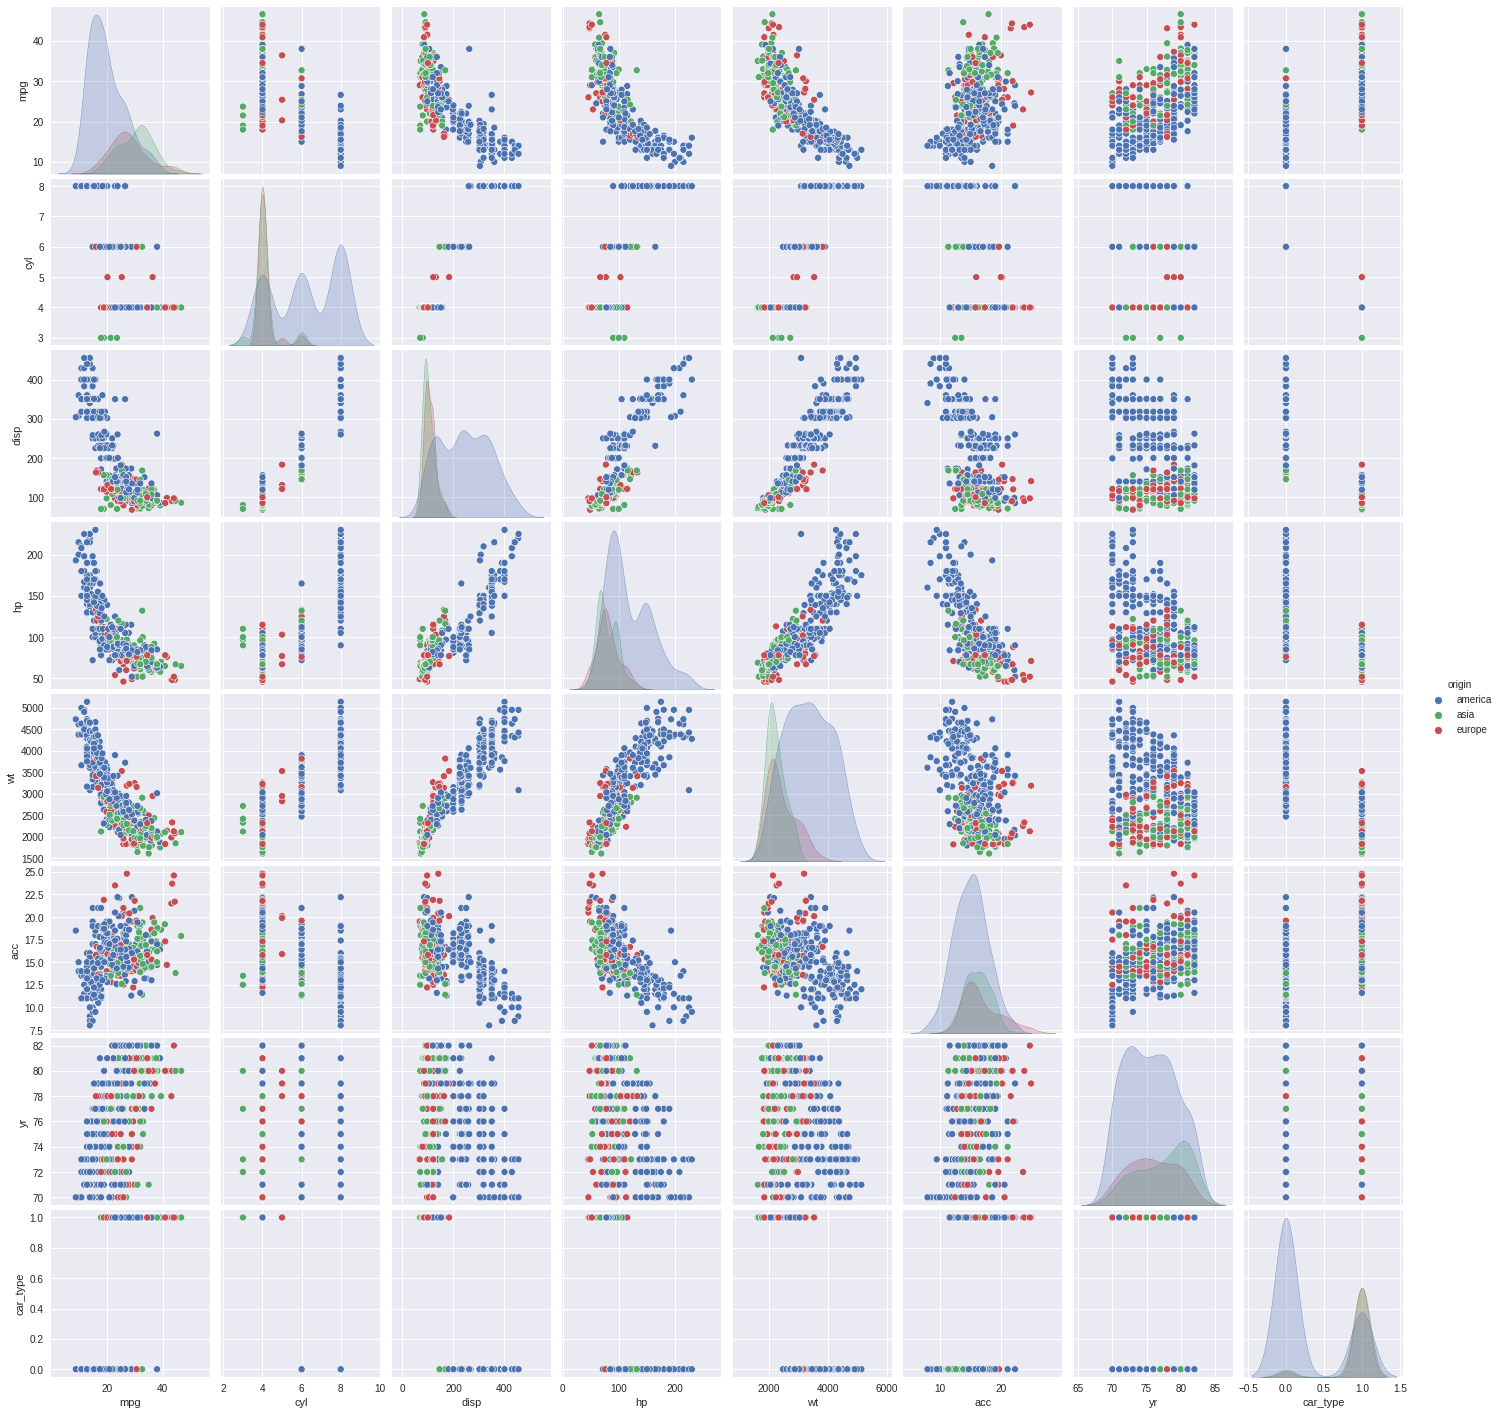

In [62]:
df_ind = df.iloc[:,0:]; sns.pairplot(df_ind, diag_kind='kde', hue='origin');

In [63]:
df = pd.get_dummies(df,columns=['origin'])

df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [64]:
X = df.drop('mpg', axis=1, inplace=False)
y = df.pop('mpg')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [65]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

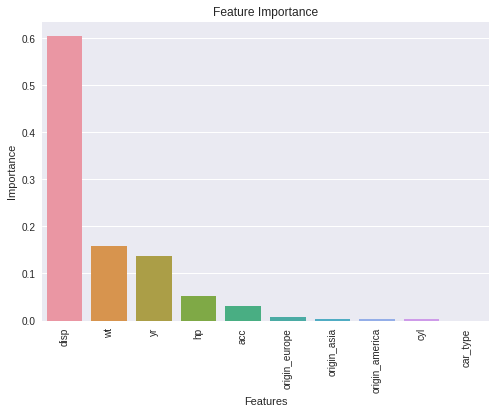

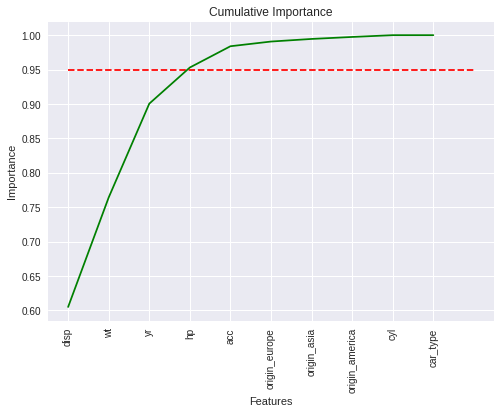

In [66]:
importances = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X.columns)
importances['features'] = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

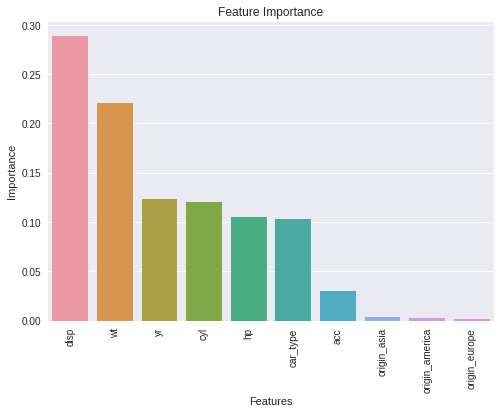

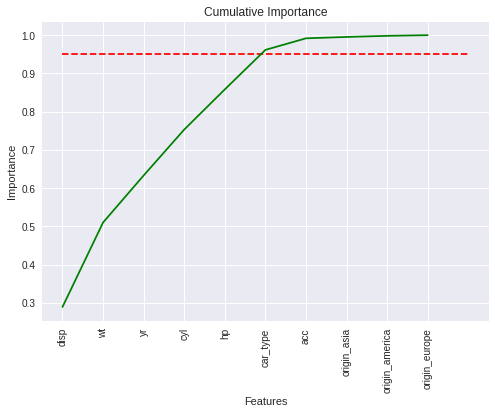

In [68]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [98]:
df = pd.read_csv('df.csv')
df = df.iloc[:,1:8]
df.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [91]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')

In [92]:
X = df.iloc[:,1:]
y = df.pop('mpg')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [93]:
lrg_model = LinearRegression()
lrg_model.fit(X_train,y_train)
lrg_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
lrg_model.intercept_

-15.967239525615103

In [95]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lrg_model.coef_[idx]))

The coefficient for cyl is -0.07697006269063947
The coefficient for disp is 0.00328803419839658
The coefficient for hp is 0.01592712473000508
The coefficient for wt is -0.007191880370285225
The coefficient for acc is 0.13066890823721541
The coefficient for yr is 0.7467048794750472


In [96]:
lrg_model.score(X_train, y_train)

0.8069501935332488

In [97]:
lrg_model.score(X_test, y_test)

0.8043478503190721

In [84]:
import statsmodels.tools as sm
import statsmodels.regression.linear_model as lm

x_train = sm.add_constant(X_train)

lrg_model2 = lm.OLS(y_train, x_train).fit()

In [85]:
lrg_model2.rsquared

0.8135658732271146

In [86]:
lrg_model2.params

const   -15.793024
cyl      -0.088516
disp      0.003265
hp        0.014439
wt       -0.007136
acc       0.106561
yr        0.750280
dtype: float64

In [88]:
print(lrg_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     197.1
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           8.93e-96
Time:                        03:40:04   Log-Likelihood:                -721.25
No. Observations:                 278   AIC:                             1457.
Df Residuals:                     271   BIC:                             1482.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.7930      5.448     -2.899      0.0

In [100]:
import statsmodels.formula.api as smf

lrg_model3 = smf.ols(formula ='mpg ~ cyl+disp+hp+wt+acc+yr', data = df).fit()
lrg_model3.rsquared

0.8087047886036486

In [101]:
lrg_model3.params

Intercept   -15.001873
cyl          -0.252741
disp          0.006938
hp            0.002572
wt           -0.006980
acc           0.092180
yr            0.757571
dtype: float64

In [102]:
print(lrg_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     275.5
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          4.76e-137
Time:                        04:16:39   Log-Likelihood:                -1053.5
No. Observations:                 398   AIC:                             2121.
Df Residuals:                     391   BIC:                             2149.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.0019      4.743     -3.163      0.0